In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
credits = pd.read_csv('the-movies-dataset/credits.csv')
keywords = pd.read_csv('the-movies-dataset/keywords.csv')
movies = pd.read_csv('the-movies-dataset/movies_metadata.csv', low_memory=False).\
    drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1)

movies['id'] = movies['id'].apply(pd.to_numeric, errors='coerce')
movies.dropna(inplace=True)
movies['id'] = movies['id'].astype('int64')

df = movies.merge(keywords, on='id').merge(credits, on='id')

df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)
df.head(5)

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
1,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
2,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
4,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",A Los Angeles Crime Saga,7.7,1886.0,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."


In [3]:
def get_text(text, obj='name'):
    text = eval(text)
    
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

In [4]:
ratings_df = pd.read_csv('the-movies-dataset/ratings.csv')

ratings_df['date'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings_df.drop('timestamp', axis=1, inplace=True)

ratings_df = ratings_df.merge(df[['id', 'original_title', 'genres', 'overview']], left_on='movieId',right_on='id', how='left')
ratings_df = ratings_df[~ratings_df['id'].isna()]
ratings_df.drop('id', axis=1, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)
ratings_df.head(5)

,userId,movieId,rating,date,original_title,genres,overview
0,1,147,4.5,2015-03-09 18:07:15,Les Quatre Cents Coups,Drama,"For young Parisian boy Antoine Doinel, life is..."
1,1,858,5.0,2015-03-09 17:52:03,Sleepless in Seattle,"Comedy, Drama, Romance",A young boy who tries to set his dad up on a d...
2,1,1246,5.0,2015-03-09 17:52:36,Rocky Balboa,Drama,When he loses a highly publicized virtual boxi...
3,1,1968,4.0,2015-03-09 18:02:28,Fools Rush In,"Drama, Comedy, Romance",Alex Whitman (Matthew Perry) is a designer fro...
4,1,2762,4.5,2015-03-09 17:48:20,Young and Innocent,"Drama, Crime",Derrick De Marney finds himself in a 39 Steps ...


In [5]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
mvoie_encoder = LabelEncoder()

ratings_df['userId'] = user_encoder.fit_transform(ratings_df['userId'])
ratings_df['movieId'] = mvoie_encoder.fit_transform(ratings_df['movieId'])

ratings_df.head(5)

,userId,movieId,rating,date,original_title,genres,overview
0,0,82,4.5,2015-03-09 18:07:15,Les Quatre Cents Coups,Drama,"For young Parisian boy Antoine Doinel, life is..."
1,0,528,5.0,2015-03-09 17:52:03,Sleepless in Seattle,"Comedy, Drama, Romance",A young boy who tries to set his dad up on a d...
2,0,637,5.0,2015-03-09 17:52:36,Rocky Balboa,Drama,When he loses a highly publicized virtual boxi...
3,0,905,4.0,2015-03-09 18:02:28,Fools Rush In,"Drama, Comedy, Romance",Alex Whitman (Matthew Perry) is a designer fro...
4,0,1140,4.5,2015-03-09 17:48:20,Young and Innocent,"Drama, Crime",Derrick De Marney finds himself in a 39 Steps ...


In [6]:
min_movie_ratings = 10000
filter_movies = (ratings_df.groupby('movieId')['rating'].sum()>min_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 200
filter_users = (ratings_df.groupby('userId')['rating'].sum()>min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

df_filterd = ratings_df[(ratings_df['movieId'].isin(filter_movies)) & (ratings_df['userId'].isin(filter_users))]

print('Shape User-Ratings unfiltered:\t{}'.format(ratings_df.shape))
print('Shape User-Ratings filtered:\t{}'.format(df_filterd.shape))

Shape User-Ratings unfiltered:	(7754672, 7)
Shape User-Ratings filtered:	(3788984, 7)


In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_filterd, test_size=0.3)
train_df.shape, test_df.shape

((2652288, 7), (1136696, 7))

In [8]:
def get_model1(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT):
    from keras.layers import Input, Embedding, Dense, Dropout, Dot
    from keras.models import Model

    movie_input = Input(shape=(1,), name='movie_id')

    movie_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_MOVIES, input_length=ROW_COUNT, name='movie_emb')(movie_input)
    
    user_input = Input(shape=(1,), name='user_id')

    user_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_USERS, input_length=ROW_COUNT, name='user_emb')(user_input)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 2)([movie_emb, user_emb])
    merged = Dropout(0.2)(merged)
    
    dense_1 = Dense(70,name='FullyConnected-1')(merged)
    dropout_1 = Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = Dense(50,name='FullyConnected-2')(dropout_1)
    dropout_2 = Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = Dense(20,name='FullyConnected-3')(dropout_2)
    dropout_3 = Dropout(0.2,name='Dropout_3')(dense_3)

    dense_4 = Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)

    result = Dense(1, name='result', activation="relu") (dense_4)
    model = Model([movie_input, user_input], result)
    model.compile(loss='mse', optimizer='adam')
    return model

In [9]:
ROW_COUNT = train_df.shape[0]
EMBEDDING_SIZE = 10
NUM_USERS = ratings_df['userId'].nunique()
NUM_MOVIES = ratings_df['movieId'].nunique()
UNIQUE_MOVIE_IDS = ratings_df['movieId'].unique()
MOVIE_METADATA = ratings_df.groupby('movieId', as_index=False)[['original_title', 'genres', 'overview']].first()

NUM_USERS, NUM_MOVIES, ROW_COUNT

(261012, 3761, 2652288)

In [10]:
model1 = get_model1(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT)

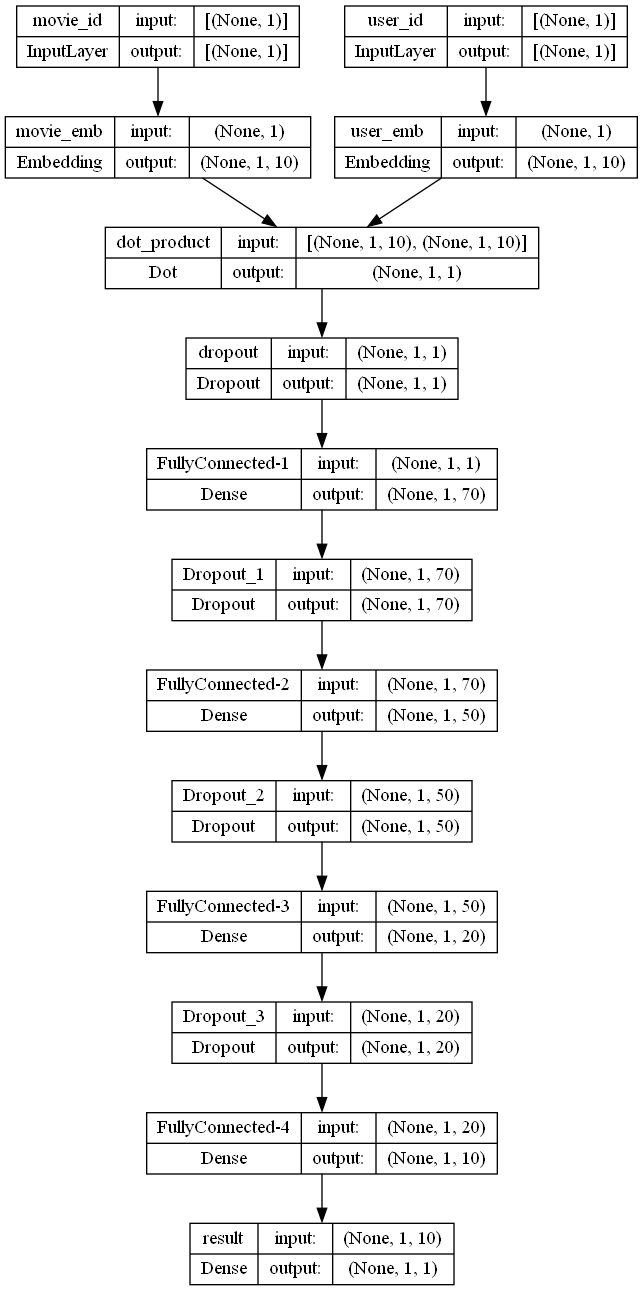

In [11]:
from keras.utils.vis_utils import plot_model

plot_model(model1, show_shapes=True, show_layer_names=True)

In [12]:
history1 = model1.fit([train_df['movieId'], train_df['userId']],
          train_df['rating'],
          batch_size=2048, 
          epochs=20,
          validation_split=0.1,
          shuffle=True)

Epoch 1/20
1166/1166 [==============================] - 65s 54ms/step - loss: 1.5574 - val_loss: 1.1250
Epoch 2/20
1166/1166 [==============================] - 65s 56ms/step - loss: 1.0853 - val_loss: 1.1178
Epoch 3/20
1166/1166 [==============================] - 69s 59ms/step - loss: 1.0479 - val_loss: 1.0684
Epoch 4/20
1166/1166 [==============================] - 65s 56ms/step - loss: 0.9181 - val_loss: 0.7616
Epoch 5/20
1166/1166 [==============================] - 65s 56ms/step - loss: 0.7486 - val_loss: 0.7257
Epoch 6/20
1166/1166 [==============================] - 59s 50ms/step - loss: 0.7089 - val_loss: 0.7122
Epoch 7/20
1166/1166 [==============================] - 58s 50ms/step - loss: 0.6870 - val_loss: 0.7013
Epoch 8/20
1166/1166 [==============================] - 64s 55ms/step - loss: 0.6730 - val_loss: 0.6935
Epoch 9/20
1166/1166 [==============================] - 79s 68ms/step - loss: 0.6632 - val_loss: 0.6938
Epoch 10/20
1166/1166 [==============================] - 66s 57m

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = model1.predict([test_df['movieId'], test_df['userId']]).reshape(-1)
y_true = test_df['rating'].values

#  Compute RMSE
rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result With Keras Matrix-Factorization: {:.4f} RMSE'.format(rmse))

35522/35522 [==============================] - 44s 1ms/step


Testing Result With Keras Matrix-Factorization: 0.8215 RMSE


In [14]:
def plot_loss(history):
    import matplotlib.pyplot as plt

    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    epoch_count = range(1, len(training_loss) + 1)

    plt.figure(figsize = (8,4))
    plt.grid()
    plt.plot(epoch_count, training_loss, '--', color='#06837f')
    plt.plot(epoch_count, test_loss, '-', color='#fed811')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

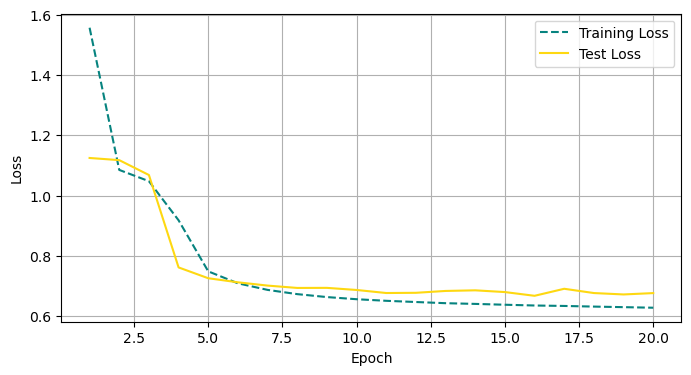

In [15]:
plot_loss(history1)

In [16]:
tags = [i.split(", ") for i in df['genres'].unique()]
GENRES = list(set([i for lst in tags for i in lst]))
GENRES.remove('')
print(GENRES)

['Animation', 'War', 'Crime', 'Science Fiction', 'Western', 'Fantasy', 'Horror', 'History', 'Music', 'Romance', 'Thriller', 'Adventure', 'TV Movie', 'Action', 'Mystery', 'Documentary', 'Foreign', 'Comedy', 'Family', 'Drama']


In [17]:
for col in GENRES:
    train_df[col] = train_df["genres"].apply(lambda x: 1 if col in x else 0)
    test_df[col] = test_df["genres"].apply(lambda x: 1 if col in x else 0)
test_df.head()


,userId,movieId,rating,date,original_title,genres,overview,Animation,War,Crime,...,Thriller,Adventure,TV Movie,Action,Mystery,Documentary,Foreign,Comedy,Family,Drama
5605024,188260,1923,4.5,2007-10-29 00:35:50,Bad Boys II,"Adventure, Action, Comedy, Thriller, Crime","Out-of-control, trash-talking buddy cops Marcu...",0,0,1,...,1,1,0,1,0,0,0,1,0,0
1724036,57628,1033,5.0,1999-04-03 04:24:41,The Golden Compass,"Adventure, Fantasy","After overhearing a shocking secret, precociou...",0,0,0,...,0,1,0,0,0,0,0,0,0,0
6992962,234656,216,5.0,1996-12-18 10:57:21,Eyes Wide Shut,"Mystery, Drama","After Dr. Bill Hartford's wife, Alice, admits ...",0,0,0,...,0,0,0,0,1,0,0,0,0,1
5220351,175159,346,4.5,2008-09-30 11:03:05,The Hours,Drama,"""The Hours"" is the story of three women search...",0,0,0,...,0,0,0,0,0,0,0,0,0,1
6572928,220659,1758,5.0,2008-11-14 01:13:39,Brothers,"Drama, Thriller, War",When his helicopter goes down during his fourt...,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [18]:
def get_model2(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT, NUM_GENRES):
    from keras.layers import Input, Embedding, Dense, Dropout, Dot, Reshape, Concatenate
    from keras.models import Model

    movie_input = Input(shape=(1,), name='movie_id')

    movie_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_MOVIES, input_length=ROW_COUNT, name='movie_emb')(movie_input)

    movie_res = Reshape(target_shape=(EMBEDDING_SIZE,), name='movie_res')(movie_emb)

    user_input = Input(shape=(1,), name='user_id')

    user_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_USERS, input_length=ROW_COUNT, name='user_emb')(user_input)

    user_res = Reshape(target_shape=(EMBEDDING_SIZE,), name='user_res')(user_emb)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 1)([movie_res, user_res])

    #############################
    genres_input = Input(shape=(NUM_GENRES,),name='genres')
    dense_gen_1 = Dense(70,name='FullyConnected-gen_1')(genres_input)
    dropout_gen_1 = Dropout(0.2,name='Dropout_gen_1')(dense_gen_1)

    dense_gen_2 = Dense(50,name='FullyConnected-gen_2')(dropout_gen_1)
    dropout_gen_2 = Dropout(0.2,name='Dropout_gen_2')(dense_gen_2)

    dense_gen_3 = Dense(20,name='FullyConnected-gen_3')(dropout_gen_2)
    dropout_gen_3 = Dropout(0.2,name='Dropout_gen_3')(dense_gen_3)

    dense_gen_4 = Dense(10,name='FullyConnected-gen_4', activation='relu')(dropout_gen_3)
    #############################

    merged = Dropout(0.2)(merged)
    
    dense_1 = Dense(70,name='FullyConnected-1')(merged)
    dropout_1 = Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = Dense(50,name='FullyConnected-2')(dropout_1)
    dropout_2 = Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = Dense(20,name='FullyConnected-3')(dropout_2)
    dropout_3 = Dropout(0.2,name='Dropout_3')(dense_3)

    dense_4 = Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)

    concat = Concatenate()([dense_4, dense_gen_4])

    result = Dense(1, name='result', activation="relu") (concat)
    model = Model([movie_input, user_input, genres_input], result)
    model.compile(loss='mse', optimizer='adam')
    return model

In [19]:
model2 = get_model2(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT, len(GENRES))

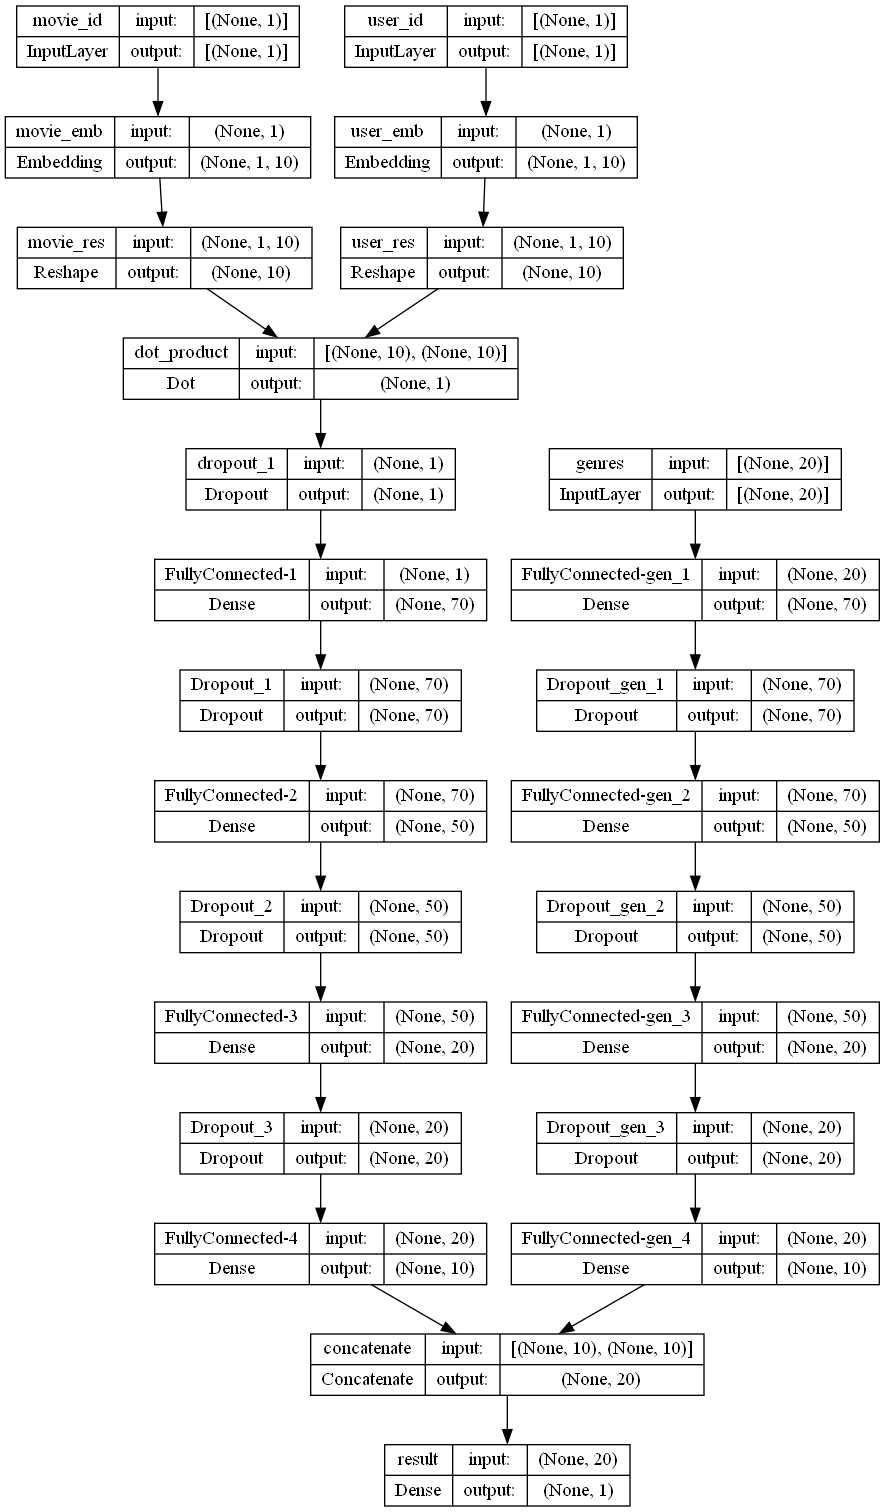

In [38]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [20]:
history2 = model2.fit([train_df['movieId'], train_df['userId'], train_df[GENRES]],
          train_df['rating'],
          batch_size=2048, 
          epochs=20,
          validation_split=0.1,
          shuffle=True)

Epoch 1/20
1166/1166 [==============================] - 72s 59ms/step - loss: 1.3004 - val_loss: 1.0254
Epoch 2/20
1166/1166 [==============================] - 71s 61ms/step - loss: 1.0395 - val_loss: 1.0168
Epoch 3/20
1166/1166 [==============================] - 72s 62ms/step - loss: 1.0112 - val_loss: 0.9936
Epoch 4/20
1166/1166 [==============================] - 70s 60ms/step - loss: 0.8286 - val_loss: 0.7214
Epoch 5/20
1166/1166 [==============================] - 66s 57ms/step - loss: 0.7230 - val_loss: 0.6997
Epoch 6/20
1166/1166 [==============================] - 67s 57ms/step - loss: 0.6916 - val_loss: 0.6847
Epoch 7/20
1166/1166 [==============================] - 67s 57ms/step - loss: 0.6746 - val_loss: 0.6924
Epoch 8/20
1166/1166 [==============================] - 73s 63ms/step - loss: 0.6617 - val_loss: 0.6850
Epoch 9/20
1166/1166 [==============================] - 75s 64ms/step - loss: 0.6538 - val_loss: 0.6812
Epoch 10/20
1166/1166 [==============================] - 72s 62m

In [21]:
y_pred = model2.predict([test_df['movieId'], test_df['userId'], test_df[GENRES]]).reshape(-1)
y_true = test_df['rating'].values

rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result With Keras Matrix-Factorization: {:.4f} RMSE'.format(rmse))

35522/35522 [==============================] - 37s 1ms/step


Testing Result With Keras Matrix-Factorization: 0.8119 RMSE


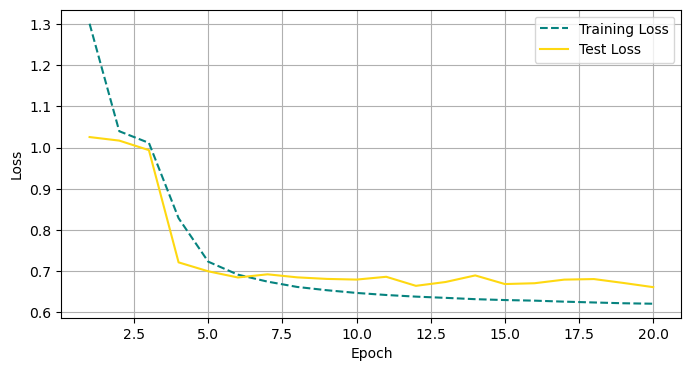

In [22]:
plot_loss(history2)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=200, stop_words='english', use_idf=True, ngram_range=(1,3))

tfidf_hybrid = tfidf.fit_transform(MOVIE_METADATA['overview'].str.lower())

In [24]:
mapping = {id:i for i, id in enumerate(MOVIE_METADATA['movieId'])}
tfidf_hybrid_array = tfidf_hybrid.toarray()

train_tfidf = []

for id in train_df['movieId'].values:
    index = mapping[id]
    train_tfidf.append(tfidf_hybrid_array[index])
    
test_tfidf = []
for id in test_df['movieId'].values:
    index = mapping[id]
    test_tfidf.append(tfidf_hybrid_array[index])

In [25]:
train_tfidf = np.vstack(train_tfidf)
test_tfidf = np.vstack(test_tfidf)
NUM_TFIDF = train_tfidf.shape[1]

In [26]:
train_tfidf.shape, test_tfidf.shape

((2652288, 200), (1136696, 200))

In [27]:
def get_model3(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT, NUM_GENRES, NUM_TFIDF):
    from keras.layers import Input, Embedding, Dense, Dropout, Dot, Reshape, Concatenate
    from keras.models import Model

    movie_input = Input(shape=(1,), name='movie_id')

    movie_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_MOVIES, input_length=ROW_COUNT, name='movie_emb')(movie_input)

    movie_res = Reshape(target_shape=(EMBEDDING_SIZE,), name='movie_res')(movie_emb)

    user_input = Input(shape=(1,), name='user_id')

    user_emb = Embedding(output_dim=EMBEDDING_SIZE, input_dim=NUM_USERS, input_length=ROW_COUNT, name='user_emb')(user_input)

    user_res = Reshape(target_shape=(EMBEDDING_SIZE,), name='user_res')(user_emb)
    
    merged = Dot(name = 'dot_product', normalize = True, axes = 1)([movie_res, user_res])

    #############################

    tfidf_input = Input(shape=(NUM_TFIDF,), name='tfidf', sparse=True)
    dense_tfidf_1 = Dense(70,name='FullyConnected-tfidf_1')(tfidf_input)
    dropout_tfidf_1 = Dropout(0.2,name='Dropout_tfidf_1')(dense_tfidf_1)

    dense_tfidf_2 = Dense(50,name='FullyConnected-tfidf_2')(dropout_tfidf_1)
    dropout_tfidf_2 = Dropout(0.2,name='Dropout_tfidf_2')(dense_tfidf_2)

    dense_tfidf_3 = Dense(20,name='FullyConnected-tfidf_3')(dropout_tfidf_2)
    dropout_tfidf_3 = Dropout(0.2,name='Dropout_tfidf_3')(dense_tfidf_3)

    dense_tfidf_4 = Dense(10,name='FullyConnected-tfidf_4', activation='relu')(dropout_tfidf_3)

    #############################
    genres_input = Input(shape=(NUM_GENRES,),name='genres')
    dense_gen_1 = Dense(70,name='FullyConnected-gen_1')(genres_input)
    dropout_gen_1 = Dropout(0.2,name='Dropout_gen_1')(dense_gen_1)

    dense_gen_2 = Dense(50,name='FullyConnected-gen_2')(dropout_gen_1)
    dropout_gen_2 = Dropout(0.2,name='Dropout_gen_2')(dense_gen_2)

    dense_gen_3 = Dense(20,name='FullyConnected-gen_3')(dropout_gen_2)
    dropout_gen_3 = Dropout(0.2,name='Dropout_gen_3')(dense_gen_3)

    dense_gen_4 = Dense(10,name='FullyConnected-gen_4', activation='relu')(dropout_gen_3)
    #############################

    merged = Dropout(0.2)(merged)
    
    dense_1 = Dense(70,name='FullyConnected-1')(merged)
    dropout_1 = Dropout(0.2,name='Dropout_1')(dense_1)

    dense_2 = Dense(50,name='FullyConnected-2')(dropout_1)
    dropout_2 = Dropout(0.2,name='Dropout_2')(dense_2)

    dense_3 = Dense(20,name='FullyConnected-3')(dropout_2)
    dropout_3 = Dropout(0.2,name='Dropout_3')(dense_3)

    dense_4 = Dense(10,name='FullyConnected-4', activation='relu')(dropout_3)

    concat = Concatenate()([dense_4, dense_gen_4, dense_tfidf_4])

    result = Dense(1, name='result', activation="relu") (concat)
    model = Model([movie_input, user_input, genres_input, tfidf_input], result)
    model.compile(loss='mse', optimizer='adam')
    return model

In [28]:
model3 = get_model3(EMBEDDING_SIZE, NUM_MOVIES, NUM_USERS, ROW_COUNT, len(GENRES), NUM_TFIDF)

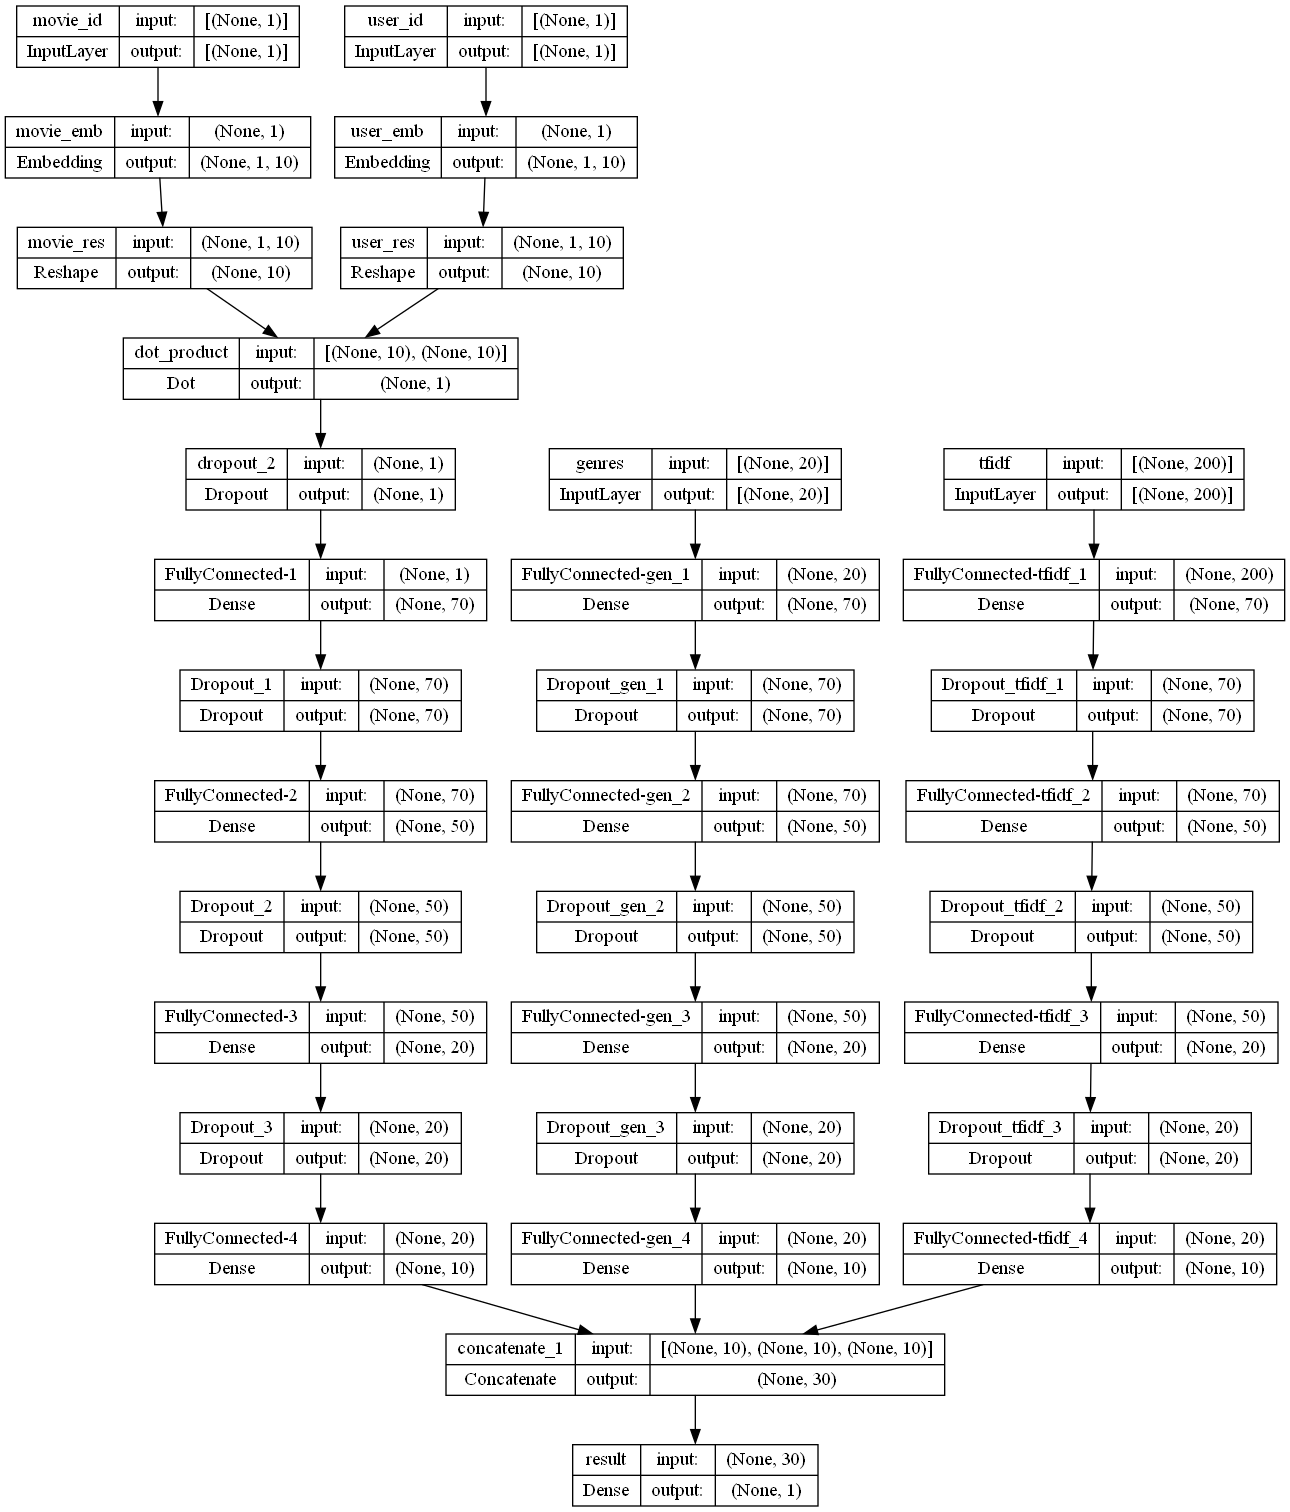

In [39]:
plot_model(model3, show_shapes=True, show_layer_names=True)

In [29]:
history3 = model3.fit([train_df['movieId'], train_df['userId'], train_df[GENRES], train_tfidf],
          train_df['rating'],
          batch_size=2048, 
          epochs=20,
          validation_split=0.1,
          shuffle=True)

Epoch 1/20
1166/1166 [==============================] - 98s 77ms/step - loss: 1.2053 - val_loss: 0.9962
Epoch 2/20
1166/1166 [==============================] - 80s 68ms/step - loss: 0.9562 - val_loss: 0.9302
Epoch 3/20
1166/1166 [==============================] - 84s 72ms/step - loss: 0.8792 - val_loss: 0.7965
Epoch 4/20
1166/1166 [==============================] - 76s 65ms/step - loss: 0.7404 - val_loss: 0.7372
Epoch 5/20
1166/1166 [==============================] - 78s 67ms/step - loss: 0.6892 - val_loss: 0.7195
Epoch 6/20
1166/1166 [==============================] - 83s 71ms/step - loss: 0.6634 - val_loss: 0.6993
Epoch 7/20
1166/1166 [==============================] - 83s 71ms/step - loss: 0.6468 - val_loss: 0.6927
Epoch 8/20
1166/1166 [==============================] - 81s 70ms/step - loss: 0.6362 - val_loss: 0.6875
Epoch 9/20
1166/1166 [==============================] - 82s 71ms/step - loss: 0.6277 - val_loss: 0.7034
Epoch 10/20
1166/1166 [==============================] - 81s 69m

In [30]:
y_pred = model3.predict([test_df['movieId'], test_df['userId'], test_df[GENRES], test_tfidf]).reshape(-1)
y_true = test_df['rating'].values

rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result With Keras Matrix-Factorization: {:.4f} RMSE'.format(rmse))

35522/35522 [==============================] - 51s 1ms/step


Testing Result With Keras Matrix-Factorization: 0.8116 RMSE


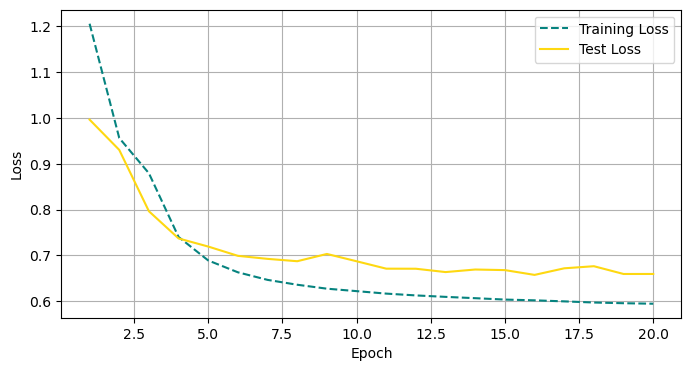

In [31]:
plot_loss(history3)

In [32]:
def recommend_movies(user, model, topN = 5):

    type_layers = [x.__class__.__name__ for x in model.layers]
    len_input_layer = type_layers.count('InputLayer')

    if len_input_layer == 2:
        pred = model.predict([np.ones(len(UNIQUE_MOVIE_IDS))*user, UNIQUE_MOVIE_IDS]).reshape(-1)
        pred_value = np.sort(pred)[::-1]
        pred = np.argsort(pred)[::-1]

    
    if len_input_layer == 3:
        aux = MOVIE_METADATA.copy()

        for col in GENRES:
            aux[col] = MOVIE_METADATA["genres"].apply(lambda x: 1 if col in x else 0)
        
        pred = model.predict([np.ones(len(UNIQUE_MOVIE_IDS))*user, UNIQUE_MOVIE_IDS, aux[GENRES]]).reshape(-1)
        pred_value = np.sort(pred)[::-1]
        pred = np.argsort(pred)[::-1]

    if len_input_layer == 4:

        aux = MOVIE_METADATA.copy()

        for col in GENRES:
            aux[col] = MOVIE_METADATA["genres"].apply(lambda x: 1 if col in x else 0)
        
        mapping = {id:i for i, id in enumerate(MOVIE_METADATA['movieId'])}
        tfidf_hybrid_array = tfidf_hybrid.toarray()
            
        tfidf = []
        for id in MOVIE_METADATA['movieId'].values:
            index = mapping[id]
            tfidf.append(tfidf_hybrid_array[index])

        pred = model.predict([np.ones(len(UNIQUE_MOVIE_IDS))*user, UNIQUE_MOVIE_IDS, aux[GENRES], np.array(tfidf)]).reshape(-1)
        pred_value = np.sort(pred)[::-1]
        pred = np.argsort(pred)[::-1]
    
    movies_seen = list(ratings_df[ratings_df['userId']==user]['movieId'])
    
    cont, pos = 0, 0
    top_pred = []
    top_pred_value = []
    while cont < topN:
        if pred[pos] not in movies_seen:
            top_pred.append(pred[pos])
            top_pred_value.append(pred_value[pos])
            cont+=1
        pos+=1

    df_indices = pd.DataFrame({'movieId':top_pred, 'rating_pred':top_pred_value})
    return df_indices.merge(MOVIE_METADATA,on='movieId')

In [33]:
recommend_movies(11, model1)

118/118 [==============================] - 0s 1ms/step


,movieId,rating_pred,original_title,genres,overview
0,2788,4.356555,Tanya's Island,"Fantasy, Drama, Romance",Tanya is a female model who lives with her boy...
1,1969,4.343624,Red Light,"Mystery, Thriller","Nick Cherney, in prison for embezzling from To..."
2,1715,4.333847,Big Trouble in Little China,"Action, Adventure, Comedy, Fantasy","When trucker, Jack Burton agreed to take his f..."
3,2518,4.332794,Kettle of Fish,"Comedy, Romance",A lifelong bachelor confronts his intimacy iss...
4,538,4.312243,Singin' in the Rain,"Comedy, Music, Romance","In 1927 Hollywood, Don Lockwood and Lina Lamon..."


In [34]:
recommend_movies(11, model2)

118/118 [==============================] - 0s 1ms/step


,movieId,rating_pred,original_title,genres,overview
0,2177,4.614961,Brannigan,"Action, Crime, Drama, Mystery, Thriller",Jim Brannigan is sent to London to bring back ...
1,176,4.519582,Terminator 2: Judgment Day,"Action, Thriller, Science Fiction",Nearly 10 years have passed since Sarah Connor...
2,2257,4.474973,In The Hands Of The Gods,"Documentary, Foreign",In the Hands of the Gods is the true story of ...
3,485,4.459572,"Good Morning, Vietnam","Comedy, Drama, War",Radio funny man Adrian Cronauer is sent to Vie...
4,1436,4.455369,A Bullet for Pretty Boy,"Action, Drama, Crime, Thriller","A biography of Charles ""Pretty Boy"" Floyd, a g..."


In [35]:
recommend_movies(11, model3)

118/118 [==============================] - 0s 1ms/step


,movieId,rating_pred,original_title,genres,overview
0,3397,4.729205,Prerokbe Ognja,"Music, Documentary",A visceral documentary focusing on the Sloveni...
1,72,4.589372,The Rolling Stones: Gimme Shelter,"Documentary, Music",This documentary of the Rolling Stones' 1969 U...
2,911,4.519206,Stage Fright,Thriller,A struggling actress tries to help a friend pr...
3,3051,4.499524,Valley of the Dragons,Science Fiction,"In 1881, Michael Denning, an American soldier,..."
4,2760,4.496757,Leben nach Microsoft,Documentary,Der Film portraitiert eine Gruppe von Microsof...


In [36]:
def plot_losses(histories):
    import matplotlib.pyplot as plt

    plt.figure(figsize = (6,6))
    plt.suptitle('Training losses', fontsize=14, weight=600, color='#333d29')
    
    for i, history in enumerate(histories):
        training_loss = history.history['loss']
        test_loss = history.history['val_loss']

        epoch_count = range(1, len(training_loss) + 1)
        plt.subplot(len(histories),1,i+1)
        plt.grid()
        plt.plot(epoch_count, training_loss, '--', color='#06837f')
        plt.plot(epoch_count, test_loss, '-', color='#fed811')
        plt.legend(['Training Loss', 'Test Loss'])
        plt.title(f'Model {i+1}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
    plt.tight_layout(pad=0.7)

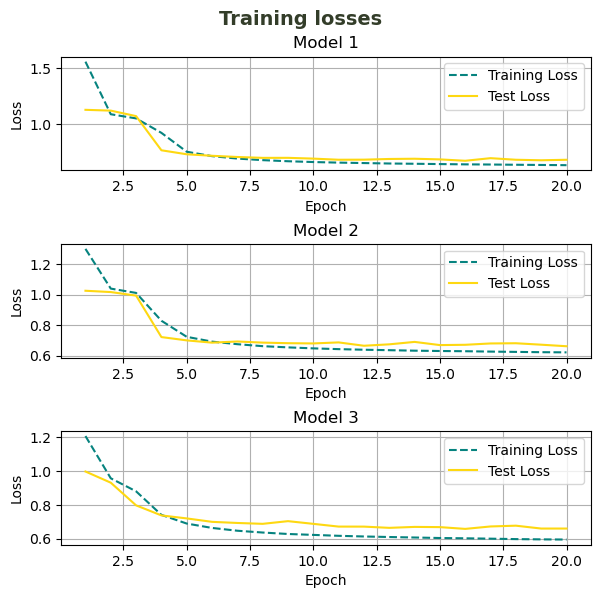

In [37]:
plot_losses([history1, history2, history3])